Epoch 1/10
1500/1500 [==============================] - 56s 37ms/step - loss: 0.1810 - accuracy: 0.9451 - val_loss: 0.0753 - val_accuracy: 0.9781
Epoch 2/10
1500/1500 [==============================] - 52s 35ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0727 - val_accuracy: 0.9772
Epoch 3/10
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0438 - accuracy: 0.9865 - val_loss: 0.0536 - val_accuracy: 0.9839
Epoch 4/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.0423 - val_accuracy: 0.9874
Epoch 5/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0274 - accuracy: 0.9911 - val_loss: 0.0434 - val_accuracy: 0.9880
Epoch 6/10
1500/1500 [==============================] - 53s 35ms/step - loss: 0.0225 - accuracy: 0.9926 - val_loss: 0.0379 - val_accuracy: 0.9893
Epoch 7/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0427 -

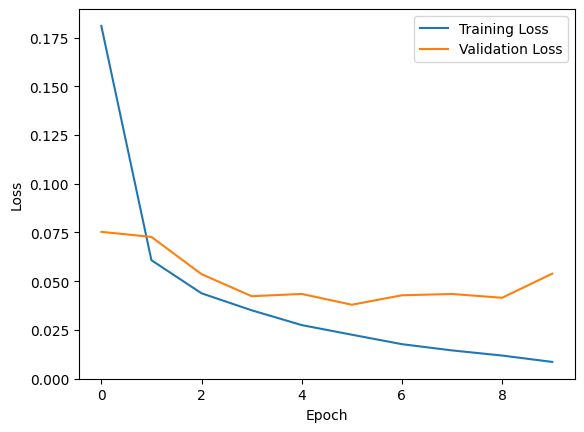

1/1 [==============================] - 0s 163ms/step


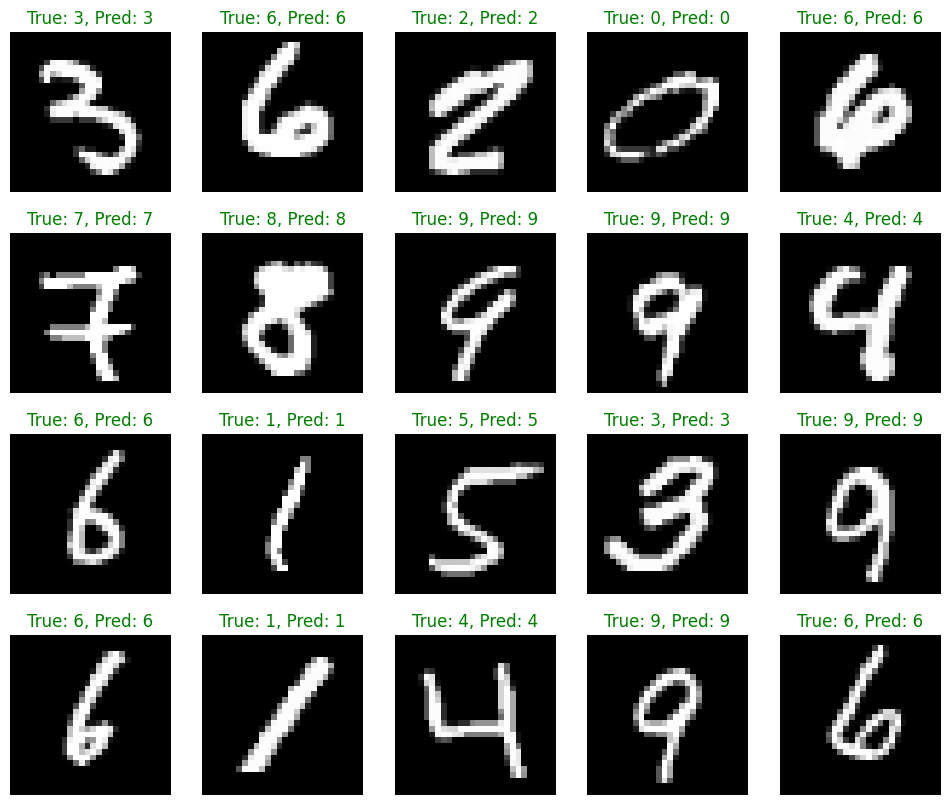

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Add a channel dimension to the input data
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

# Split the training data into training and validation sets
validation_split = 0.2
split_index = int(len(x_train) * (1 - validation_split))
x_val, y_val = x_train[split_index:], y_train[split_index:]
x_train, y_train = x_train[:split_index], y_train[:split_index]

# Define the neural network architecture
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation="softmax")
])

# Compile the model with sparse categorical crossentropy as the loss function
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the training data with validation
epochs = 10
batch_size = 32
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Select 20 random images from the training set
sample_indices = np.random.choice(len(x_train), 20, replace=False)
x_sample = x_train[sample_indices]
y_sample = y_train[sample_indices]

# Make predictions on the sample images
predictions = model.predict(x_sample)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the sample images with labels and color-coded predictions
fig, axs = plt.subplots(4, 5, figsize=(12, 10))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(x_sample[i, :, :, 0], cmap='gray')
    true_label = y_sample[i]
    predicted_label = predicted_labels[i]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    ax.set_title(f"True: {true_label}, Pred: {predicted_label}", color=color)
    ax.axis('off')
plt.show()